# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from config import api_key

#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



654


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Retrieve articles

city_names = cities
city_weather = []
weather = {'City':[], 
           'Lat':[], 
            'Lng':[],
            'Max Temp':[],
            'Humidity':[],
           'Cloudiness':[],
           'Wind Speed':[],
           'Country':[],
           'Date':[]
             }
i=0
for city_name in city_names:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&appid={api_key}"
    result = requests.get(query_url).json()
    if 'coord' in result:
        
        city_weather.append(result)
        print(f"Retrieving weather data for city number {city_names.index(city_name)+1}:  {city_name}")
        number = city_names.index(city_name)+1
        
        name = city_weather[i]['name']
        lat = city_weather[i]['coord']['lat']
        lng = city_weather[i]['coord']['lon']
        cur_temp = city_weather[i]['main']['temp']
        max_temp = city_weather[i]['main']['temp_max']
        hum = city_weather[i]['main']['humidity']
        clouds = city_weather[i]['clouds']['all']
        wind = city_weather[i]['wind']['speed']
        country = city_weather[i]['sys']['country']
        date = city_weather[i]['dt']
    
        weather['City'].append(name)
        weather['Lat'].append(lat) 
        weather['Lng'].append(lng) 
        weather['Max Temp'].append(max_temp) 
        weather['Humidity'].append(hum) 
        weather['Cloudiness'].append(clouds) 
        weather['Country'].append(country) 
        weather['Wind Speed'].append(wind)
        weather['Date'].append(date) 
        i+=1
    else:
        print(f"{city_name} not found, skip this one")
    
      

#print(number,name, lat, hum, clouds, wind, country, date)

#print (result)   


#pprint(city_weather)




ituni not found, skip this one
Retrieving weather data for city number 2:  cape town
Retrieving weather data for city number 3:  ushuaia
Retrieving weather data for city number 4:  arraial do cabo
Retrieving weather data for city number 5:  basco
Retrieving weather data for city number 6:  balikpapan
Retrieving weather data for city number 7:  mar del plata
Retrieving weather data for city number 8:  orzu
Retrieving weather data for city number 9:  port alfred
Retrieving weather data for city number 10:  punta arenas
Retrieving weather data for city number 11:  georgetown
belushya guba not found, skip this one
Retrieving weather data for city number 13:  atuona
Retrieving weather data for city number 14:  itarema
Retrieving weather data for city number 15:  porto santo
Retrieving weather data for city number 16:  biak
Retrieving weather data for city number 17:  guarapari
barentsburg not found, skip this one
Retrieving weather data for city number 19:  torbay
Retrieving weather data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather)
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0          Cape Town -33.93   18.42     71.01        68           0   
1            Ushuaia -54.80  -68.30     51.80        49          40   
2    Arraial do Cabo -22.97  -42.03     77.00        88           0   
3              Basco  20.45  121.97     73.36        84         100   
4         Balikpapan  -1.27  116.83     77.00       100          20   
..               ...    ...     ...       ...       ...         ...   
598         Portland  45.52 -122.68     51.01        91         100   
599            Alofi -19.06 -169.92     77.00       100          75   
600        Indramayu  -6.33  108.32     79.47        80         100   
601             Nome  64.50 -165.41    -18.40        68           1   
602           Slonim  53.09   25.32     30.56        97           2   

     Wind Speed Country        Date  
0         17.22      ZA  1608506101  
1         29.97      AR  1608505952  
2         10.29      BR  1608506201  
3         36.26      PH  1608506201  
4          2.24      ID  1608506201  
..          ...     ...         ...  
598        3.00      US  1608505772  
599        8.05      NU  1608506275  
600        3.89      ID  1608506276  
601        3.36      US  1608506060  
602        7.72      BY  1608506276  

[603 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
len(weather_df)
for i in range(len(weather_df)):
    if weather_df['Humidity'][i] > 100:
        print(i)
        print(weather_df['Humidity'][i])
        
        weather_df.drop(index=i)

clean_city_data = weather_df        
len(clean_city_data)





603

In [31]:
clean_city_data.head()


City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0        Cape Town -33.93   18.42     71.01        68           0       17.22   
1          Ushuaia -54.80  -68.30     51.80        49          40       29.97   
2  Arraial do Cabo -22.97  -42.03     77.00        88           0       10.29   
3            Basco  20.45  121.97     73.36        84         100       36.26   
4       Balikpapan  -1.27  116.83     77.00       100          20        2.24   

  Country        Date  
0      ZA  1608506101  
1      AR  1608505952  
2      BR  1608506201  
3      PH  1608506201  
4      ID  1608506201

In [95]:
#Define function for making  scatter plots

def make_scatter_plot(x, y, x_lab, y_lab,title):
    "This creates a scatter plot given a list of x values, y values, x label, y label and title"
    plt.scatter(x, y)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    plt.savefig(f"{x_lab}_{y_lab}.png")
    plt.ylim(min(y)-10,max(y)+10)
    
    linregress(x,y)
    reg = linregress(x,y)
    reg_line = reg[0]*x + reg[1]

    plt.plot(x,reg_line, color="red")
    r_squared = round(reg[2]**2,2)
    print(f"r squared = {r_squared}")
              


## Latitude vs. Temperature Plot

r squared = 0.55


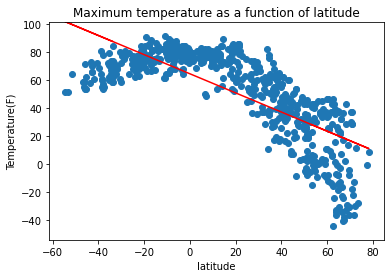

In [96]:
make_scatter_plot(clean_city_data['Lat'],
                  clean_city_data['Max Temp'],
                  "latitude",
                  "Temperature(F)",
                  "Maximum temperature as a function of latitude"
                  )


## Latitude vs. Humidity Plot

r squared = 0.03


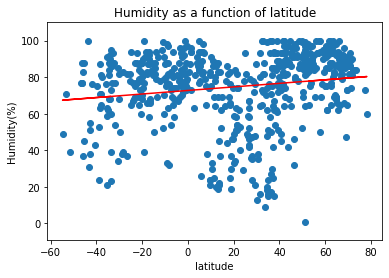

In [97]:
make_scatter_plot(clean_city_data['Lat'],
                  clean_city_data['Humidity'],
                  "latitude",
                  "Humidity(%)",
                  "Humidity as a function of latitude"
                  )

## Latitude vs. Cloudiness Plot

r squared = 0.0


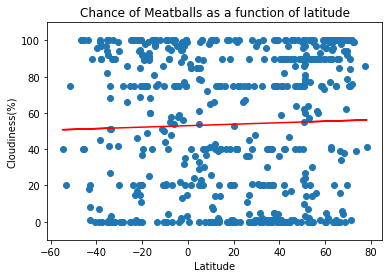

In [98]:
make_scatter_plot(clean_city_data['Lat'],
                  clean_city_data['Cloudiness'],
                  "Latitude",
                  "Cloudiness(%)",
                  "Chance of Meatballs as a function of latitude"
                  )

## Latitude vs. Wind Speed Plot

r squared = 0.0


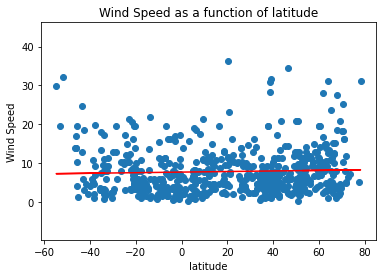

In [99]:
make_scatter_plot(clean_city_data['Lat'],
                  clean_city_data['Wind Speed'],
                  "latitude",
                  "Wind Speed",
                  "Wind Speed as a function of latitude"
                  )

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [85]:
linear_regression(weather_df['Lat'], weather_df['Max Temp'])

NameError: name 'stats' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression